# Usage Evaluator and Visualizator

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.model_selection import train_test_split

from embedder import Embedder
from embedder import Model
from evaluator import Evaluator
from visualizator import Visualizator
from graph_generator import Graph_Generator

from sklearn.decomposition import TruncatedSVD
from eden import graph

# Generate set of graphs and test it

## Test 1
### perturbations times = 10
### length label alphabet = 5
### procedure repeated 5 times
### dimensions = 2, 4, 8, 16, 32, 64

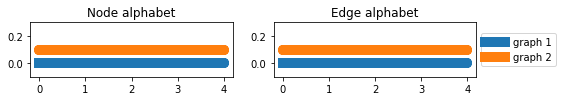

In [2]:
n_graphs = 2000
degree = 4
seed = 10
node_alph_end_g1 = 5
node_alph_end_g2 = 5
pert_times_g1 = 10
pert_times_g2 = 10
n_nodes = 25 

# instanziate class Graph_Generator
gen = Graph_Generator(n_graphs = n_graphs , degree = degree, seed = seed)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = n_nodes,
                                          node_alph_end = node_alph_end_g1,
                                          edge_alph_end = 5,
                                         seed=seed)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = n_nodes,
                                          node_alph_end = node_alph_end_g2,
                                          edge_alph_end = 5,
                                         seed=seed)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 pert_times_g1 = pert_times_g1,
                                 pert_times_g2 = pert_times_g2,                                 
                                 plot = True)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


dim = np.logspace(1, 6, num=6, base=2)
vis = Visualizator(dim, n_classifiers = 2)
times = 5

for i in range(0,times):
    X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3)
    y_test = [[i] for i in y_test]
    y_test = np.ravel(y_test)
    y_train = [[i] for i in y_train]
    y_train = np.ravel(y_train)

    print('iteartion: ',i+1)
    for d in dim:
        
        dimension_embedding = int(d)

        # instanziate first model
        eden = graph.Vectorizer(complexity = 1)
        model1 = Model(eden, has_fit = False)

        # instanziate second model
        pca = TruncatedSVD(n_components=dimension_embedding)
        model2 = Model(pca)


        # fit and transform
        # mode1 --> model2 
        emb = Embedder([model1,model2])
        X_small = emb.fit(X_train,y_train).transform(X_test)

        # instaniate two evaluators
        evaluator = Evaluator(KNeighborsClassifier(n_neighbors=1))
        evaluator_1 = Evaluator(RandomForestClassifier(n_estimators=1))
        
        # compute the metrics
        acc, pre, rec, f = evaluator.performance_with_kfold(X_small,y_test)
        acc_1, pre_1, rec_1, f_1 = evaluator_1.performance_with_kfold(X_small,y_test)
        
        # add the computed performance in the visualizzator
        vis.add_metrics(acc,pre,rec,f,acc_1, pre_1, rec_1, f_1)

        

iteartion:  1
iteartion:  2
iteartion:  3
iteartion:  4
iteartion:  5


### Print a summay of the models

In [6]:
vis.summarize(len(X_train),len(X_test),method_name_1="knn",method_name_2="random forest")

Dimensions:  [ 2.  4.  8. 16. 32. 64.]

Train set size:  1400
Test set size:  600
*****************************
knn
                2.0       4.0       8.0      16.0      32.0      64.0
---------  --------  --------  --------  --------  --------  --------
Accuracy   0.659304  0.681424  0.704679  0.743361  0.734444  0.723964
Precision  0.666144  0.691371  0.709468  0.744126  0.72914   0.711086
Recall     0.666262  0.682592  0.71439   0.756393  0.764217  0.772533
F1         0.662628  0.684409  0.709954  0.748001  0.743418  0.738459
*****************************
random forest
                2.0       4.0       8.0      16.0      32.0      64.0
---------  --------  --------  --------  --------  --------  --------
Accuracy   0.668607  0.664599  0.694594  0.719997  0.660909  0.659458
Precision  0.664338  0.685411  0.686147  0.725697  0.681688  0.661699
Recall     0.667233  0.690198  0.702084  0.696731  0.691718  0.657735
F1         0.669002  0.670895  0.694046  0.715801  0.674198  0.635956


### Mixed plot

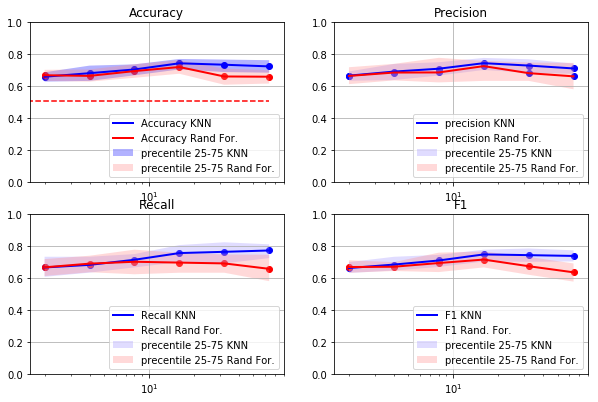

In [7]:
vis.mixed_plot(y_test)

### plot only model 1


**********************************************************
Model:  1



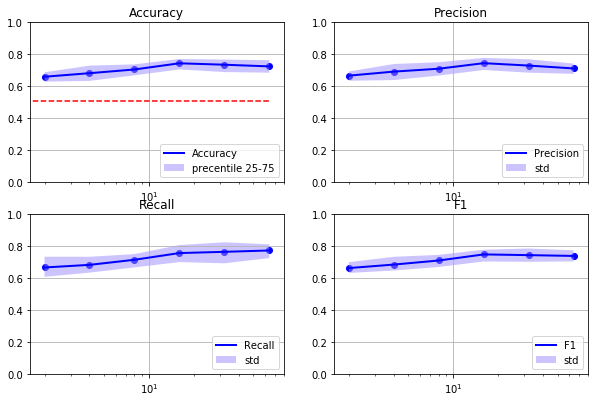

In [8]:
vis.single_plot(y_test,model=1)

### plot only model 2


**********************************************************
Model:  2



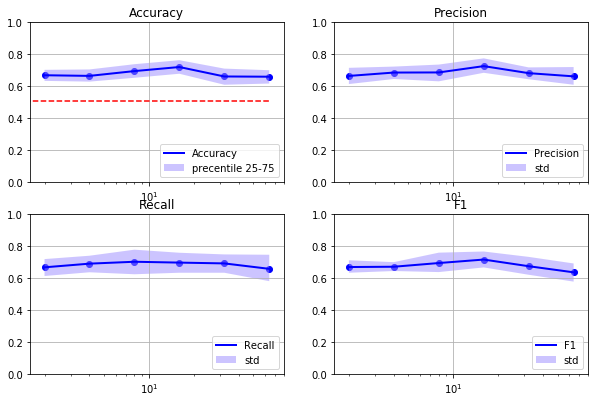

In [9]:
vis.single_plot(y_test,model=2)

## Test 2
### perturbations times = 15
### length label alphabet = 5
### procedure repeated 5 times
### dimensions = 2, 4, 8, 16, 32, 64

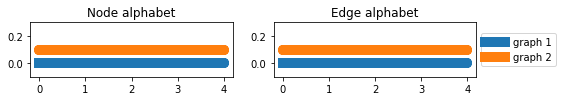

In [13]:
n_graphs = 2000
degree = 4
seed = 10
node_alph_end_g1 = 5
node_alph_end_g2 = 5
pert_times_g1 = 7
pert_times_g2 = 7
n_nodes = 25 

# instanziate class Graph_Generator
gen = Graph_Generator(n_graphs = n_graphs , degree = degree, seed = seed)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = n_nodes,
                                          node_alph_end = node_alph_end_g1,
                                          edge_alph_end = 5,
                                         seed=seed)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = n_nodes,
                                          node_alph_end = node_alph_end_g2,
                                          edge_alph_end = 5,
                                         seed=seed)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 pert_times_g1 = pert_times_g1,
                                 pert_times_g2 = pert_times_g2,                                 
                                 plot = True)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


dim = np.logspace(1, 6, num=6, base=2)
vis = Visualizator(dim, n_classifiers = 2)
times = 5

for i in range(0,times):
    X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3)
    y_test = [[i] for i in y_test]
    y_test = np.ravel(y_test)
    y_train = [[i] for i in y_train]
    y_train = np.ravel(y_train)

    print('iteartion: ',i+1)
    for d in dim:
        
        dimension_embedding = int(d)

        # instanziate first model
        eden = graph.Vectorizer(complexity = 1)
        model1 = Model(eden, has_fit = False)

        # instanziate second model
        pca = TruncatedSVD(n_components=dimension_embedding)
        model2 = Model(pca)


        # fit and transform
        # mode1 --> model2 
        emb = Embedder([model1,model2])
        X_small = emb.fit(X_train,y_train).transform(X_test)

        # instaniate two evaluators
        evaluator = Evaluator(KNeighborsClassifier(n_neighbors=1))
        evaluator_1 = Evaluator(RandomForestClassifier(n_estimators=1))
        
        # compute the metrics
        acc, pre, rec, f = evaluator.performance_with_kfold(X_small,y_test)
        acc_1, pre_1, rec_1, f_1 = evaluator_1.performance_with_kfold(X_small,y_test)
        
        # add the computed performance in the visualizzator
        vis.add_metrics(acc,pre,rec,f,acc_1, pre_1, rec_1, f_1)

        

iteartion:  1
iteartion:  2
iteartion:  3
iteartion:  4
iteartion:  5


Dimensions:  [ 2.  4.  8. 16. 32. 64.]

Train set size:  1400
Test set size:  600
*****************************
knn
                2.0       4.0       8.0      16.0      32.0      64.0
---------  --------  --------  --------  --------  --------  --------
Accuracy   0.801938  0.80954   0.90793   0.905285  0.900662  0.891273
Precision  0.809986  0.813533  0.906359  0.892016  0.886175  0.878816
Recall     0.811054  0.825805  0.919445  0.93318   0.931851  0.919711
F1         0.809057  0.817949  0.911667  0.910805  0.906783  0.897193
*****************************
random forest
                2.0       4.0       8.0      16.0      32.0      64.0
---------  --------  --------  --------  --------  --------  --------
Accuracy   0.771319  0.77727   0.844484  0.85709   0.78824   0.796568
Precision  0.798374  0.777758  0.867845  0.874688  0.807074  0.783582
Recall     0.79348   0.782144  0.859468  0.856516  0.828433  0.755704
F1         0.783704  0.789879  0.862368  0.870015  0.811102  0.781487


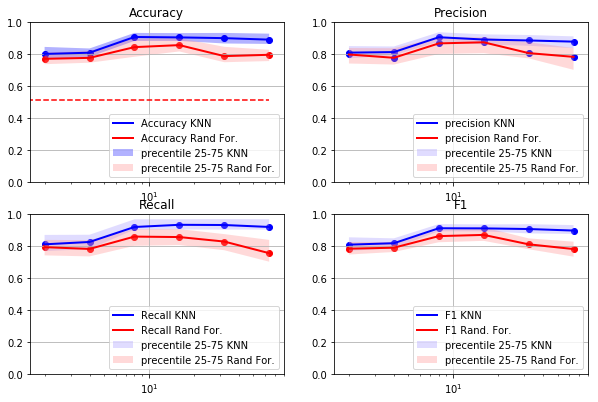

In [15]:
vis.summarize(len(X_train),len(X_test),method_name_1="knn",method_name_2="random forest")
vis.mixed_plot(y_test)

# Real Data
### AIDS

In [29]:
from load_data import load_data
graphs, labels = load_data("AIDS")



from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


dim = np.logspace(1, 6, num=6, base=2)
vis = Visualizator(dim, n_classifiers = 2)
times = 5

for i in range(0,times):
    X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3)
    y_test = [[i] for i in y_test]
    y_test = np.ravel(y_test)
    y_train = [[i] for i in y_train]
    y_train = np.ravel(y_train)

    print('iteartion: ',i+1)
    for d in dim:
        
        dimension_embedding = int(d)

        # instanziate first model
        eden = graph.Vectorizer(complexity = 1)
        model1 = Model(eden, has_fit = False)

        # instanziate second model
        pca = TruncatedSVD(n_components=dimension_embedding)
        model2 = Model(pca)

        # fit and transform
        # mode1 --> model2 
        emb = Embedder([model1,model2])
        X_small = emb.fit(X_train,y_train).transform(X_test)

        # instaniate two evaluators
        evaluator = Evaluator(KNeighborsClassifier(n_neighbors=1))
        evaluator_1 = Evaluator(RandomForestClassifier(n_estimators=1))
        
        # compute the metrics
        acc, pre, rec, f = evaluator.performance_with_kfold(X_small,y_test)
        acc_1, pre_1, rec_1, f_1 = evaluator_1.performance_with_kfold(X_small,y_test)
        
        # add the computed performance in the visualizzator
        vis.add_metrics(acc,pre,rec,f,acc_1, pre_1, rec_1, f_1)

        

iteartion:  1
iteartion:  2
iteartion:  3
iteartion:  4
iteartion:  5


Dimensions:  [ 2.  4.  8. 16. 32. 64.]

Train set size:  1400
Test set size:  600
*****************************
knn
                2.0       4.0       8.0      16.0      32.0      64.0
---------  --------  --------  --------  --------  --------  --------
Accuracy   0.852993  0.862661  0.906005  0.925068  0.930707  0.928668
Precision  0.90562   0.913269  0.950519  0.961711  0.963259  0.966775
Recall     0.909179  0.914178  0.930587  0.9434    0.94889   0.942497
F1         0.906772  0.913003  0.939496  0.951921  0.955562  0.954059
*****************************
random forest
                2.0       4.0       8.0      16.0      32.0      64.0
---------  --------  --------  --------  --------  --------  --------
Accuracy   0.824018  0.83708   0.859339  0.857711  0.851643  0.832753
Precision  0.894813  0.890657  0.912595  0.917014  0.908188  0.904149
Recall     0.88877   0.886901  0.908799  0.914233  0.904624  0.885979
F1         0.892466  0.89898   0.905094  0.91208   0.901839  0.892805


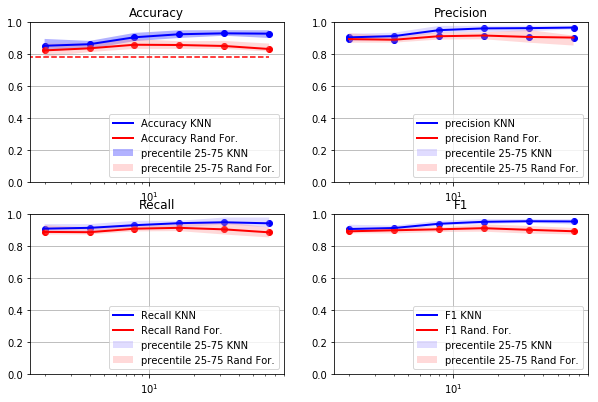

In [30]:
vis.summarize(len(X_train),len(X_test),method_name_1="knn",method_name_2="random forest")
vis.mixed_plot(y_test)

### PROTEINS

In [31]:
from load_data import load_data
graphs, labels = load_data("PROTEINS")



from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


dim = np.logspace(1, 6, num=6, base=2)
vis = Visualizator(dim, n_classifiers = 2)
times = 5

for i in range(0,times):
    X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3)
    y_test = [[i] for i in y_test]
    y_test = np.ravel(y_test)
    y_train = [[i] for i in y_train]
    y_train = np.ravel(y_train)

    print('iteartion: ',i+1)
    for d in dim:
        
        dimension_embedding = int(d)

        # instanziate first model
        eden = graph.Vectorizer(complexity = 1)
        model1 = Model(eden, has_fit = False)

        # instanziate second model
        pca = TruncatedSVD(n_components=dimension_embedding)
        model2 = Model(pca)

        # fit and transform
        # mode1 --> model2 
        emb = Embedder([model1,model2])
        X_small = emb.fit(X_train,y_train).transform(X_test)

        # instaniate two evaluators
        evaluator = Evaluator(KNeighborsClassifier(n_neighbors=1))
        evaluator_1 = Evaluator(RandomForestClassifier(n_estimators=1))
        
        # compute the metrics
        acc, pre, rec, f = evaluator.performance_with_kfold(X_small,y_test)
        acc_1, pre_1, rec_1, f_1 = evaluator_1.performance_with_kfold(X_small,y_test)
        
        # add the computed performance in the visualizzator
        vis.add_metrics(acc,pre,rec,f,acc_1, pre_1, rec_1, f_1)

        

iteartion:  1
iteartion:  2
iteartion:  3
iteartion:  4
iteartion:  5


Dimensions:  [ 2.  4.  8. 16. 32. 64.]

Train set size:  779
Test set size:  334
*****************************
knn
                2.0       4.0       8.0      16.0      32.0      64.0
---------  --------  --------  --------  --------  --------  --------
Accuracy   0.598409  0.637182  0.643491  0.638087  0.650068  0.640374
Precision  0.662165  0.688444  0.693409  0.683997  0.698702  0.689999
Recall     0.640433  0.687865  0.700836  0.707222  0.706947  0.700901
F1         0.646463  0.684454  0.692927  0.691557  0.699244  0.69217
*****************************
random forest
                2.0       4.0       8.0      16.0      32.0      64.0
---------  --------  --------  --------  --------  --------  --------
Accuracy   0.581571  0.603362  0.61611   0.597967  0.59615   0.569286
Precision  0.654666  0.683095  0.673473  0.646612  0.639388  0.626324
Recall     0.640626  0.649     0.672737  0.658953  0.649667  0.652082
F1         0.62424   0.670639  0.667871  0.632476  0.660238  0.617532


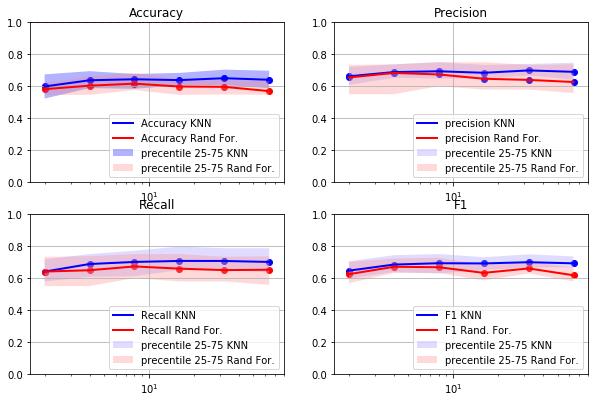

In [32]:
vis.summarize(len(X_train),len(X_test),method_name_1="knn",method_name_2="random forest")
vis.mixed_plot(y_test)